In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 636.0+ bytes


Standar Missing Values

In [5]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [6]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

Non-Standard Missing Values

In [7]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [8]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [9]:
missing_values = ["n/a", "na", "--"]

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv", na_values = missing_values)

In [11]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [12]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

Unexpected Missing Values

In [13]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [14]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [15]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [16]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


Summarizing Missing Values

In [17]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [18]:
df.isnull().values.any()

True

In [19]:
df.isnull().sum().sum()

12

In [20]:
df['ST_NUM'].fillna(125, inplace=True)

In [21]:
df.loc[2, 'ST_NUM'] = 125

In [22]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [23]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [24]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    3.0
3    1.0
4    3.0
5    3.0
6    2.0
7    3.0
8    3.0
Name: NUM_BEDROOMS, dtype: float64

In [25]:
df.isna().sum()

PID             1
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    0
NUM_BATH        1
SQ_FT           2
dtype: int64

In [26]:
df['PID'].fillna(100005000, inplace=True)

In [27]:
df.loc[4, 'PID'] = 100005000.0

In [28]:
df['PID']

0    100001000.0
1    100002000.0
2    100003000.0
3    100004000.0
4    100005000.0
5    100006000.0
6    100007000.0
7    100008000.0
8    100009000.0
Name: PID, dtype: float64

In [29]:
df['OWN_OCCUPIED'].fillna('Y', inplace=True)

In [30]:
df['OWN_OCCUPIED']

0    Y
1    N
2    N
3    Y
4    Y
5    Y
6    Y
7    Y
8    Y
Name: OWN_OCCUPIED, dtype: object

In [31]:
df['NUM_BATH'] = pd.to_numeric(df['NUM_BATH'], errors='coerce')

In [32]:
median = df['NUM_BATH'].median()
df['NUM_BATH'].fillna(median, inplace=True)

In [33]:
df['NUM_BATH']

0    1.0
1    1.5
2    1.0
3    1.0
4    2.0
5    1.0
6    1.0
7    1.0
8    2.0
Name: NUM_BATH, dtype: float64

In [34]:
median = df['SQ_FT'].median()
df['SQ_FT'].fillna(median, inplace=True)

In [35]:
df['SQ_FT']

0    1000.0
1     950.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7     950.0
8    1800.0
Name: SQ_FT, dtype: float64

In [36]:
df.isna().sum()

PID             0
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    0
NUM_BEDROOMS    0
NUM_BATH        0
SQ_FT           0
dtype: int64

Analyzing Obsity in England

In [39]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [40]:
#!pip install xlrd

In [41]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [42]:
data_age = data.parse(u'7.2', skiprows=4, skipfooteer=14)

In [43]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [44]:
data_age.rename(columns={u'Unnamed: 0' : u'Year'}, inplace=True)

In [45]:
data_age.dropna(inplace=True)

In [46]:
data_age.set_index('Year', inplace=True)

In [47]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<Axes: xlabel='Year'>

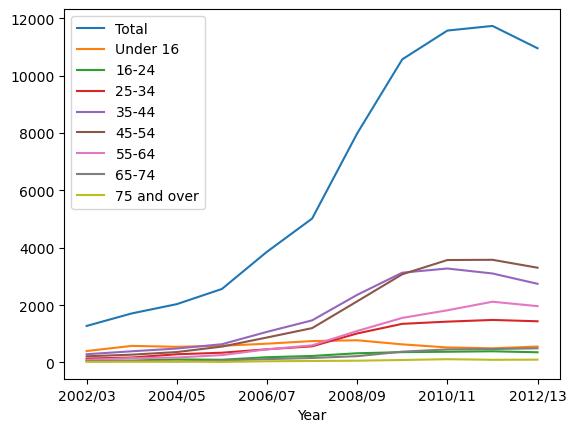

In [48]:
data_age.plot()

In [49]:
data_age_minus_total = data_age.drop('Total', axis=1)

<Axes: xlabel='Year'>

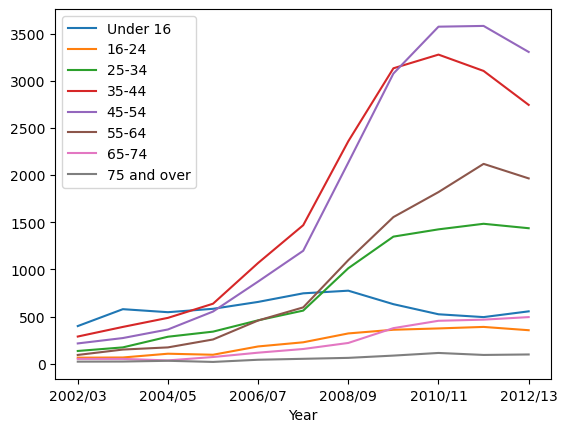

In [50]:
data_age_minus_total.plot()

<Axes: xlabel='Year'>

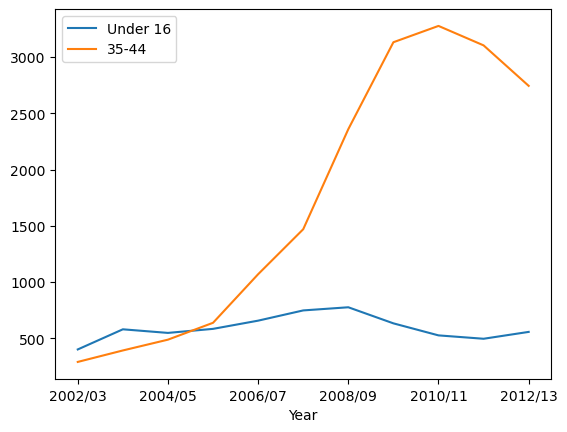

In [51]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

In [52]:
from datetime import datetime

In [53]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [54]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [55]:
df = pd.DataFrame(date_rng, columns=['date'])

In [56]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [57]:
df.head()

,date,data
0,2020-01-01 00:00:00,39
1,2020-01-01 01:00:00,65
2,2020-01-01 02:00:00,8
3,2020-01-01 03:00:00,69
4,2020-01-01 04:00:00,21


In [58]:
df['datetime'] = pd.to_datetime(df['date'])

In [59]:
df = df.set_index('datetime')

In [60]:
df.drop(['date'], axis=1, inplace=True)

In [61]:
df.head()

,data
datetime,
2020-01-01 00:00:00,39
2020-01-01 01:00:00,65
2020-01-01 02:00:00,8
2020-01-01 03:00:00,69
2020-01-01 04:00:00,21


In [62]:
string_date_rng = [str(x) for x in date_rng]

In [63]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [64]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [65]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [66]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [67]:
string_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

In [68]:
string_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [69]:
df2 = pd.DataFrame(string_date_rng_2, columns=['date'])

In [70]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [71]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,64
2020-01-02 01:00:00,19
2020-01-02 02:00:00,26
2020-01-02 03:00:00,61
2020-01-02 04:00:00,69
2020-01-02 05:00:00,2
2020-01-02 06:00:00,34
2020-01-02 07:00:00,93
2020-01-02 08:00:00,29


In [72]:
df['2020-01-03']

C:\Users\andre\AppData\Local\Temp\ipykernel_7700\186698106.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,60
2020-01-03 01:00:00,41
2020-01-03 02:00:00,34
2020-01-03 03:00:00,6
2020-01-03 04:00:00,39
2020-01-03 05:00:00,46
2020-01-03 06:00:00,20
2020-01-03 07:00:00,17
2020-01-03 08:00:00,34


In [73]:
df['2020-01-04' : '2020-01-06']

,data
datetime,
2020-01-04 00:00:00,69
2020-01-04 01:00:00,96
2020-01-04 02:00:00,45
2020-01-04 03:00:00,32
2020-01-04 04:00:00,70
...,...
2020-01-06 19:00:00,71
2020-01-06 20:00:00,75
2020-01-06 21:00:00,96


In [74]:
df.resample('D').mean()

,data
datetime,
2020-01-01,48.083333
2020-01-02,51.083333
2020-01-03,44.541667
2020-01-04,68.916667
2020-01-05,66.625000
2020-01-06,52.875000
2020-01-07,47.416667
2020-01-08,72.000000


In [75]:
df['rolling_sum'] = df.rolling(3).sum()

In [76]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,39,NaN
2020-01-01 01:00:00,65,NaN
2020-01-01 02:00:00,8,112.0
2020-01-01 03:00:00,69,142.0
2020-01-01 04:00:00,21,98.0


In [77]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [78]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,39,NaN,112.0
2020-01-01 01:00:00,65,NaN,112.0
2020-01-01 02:00:00,8,112.0,112.0
2020-01-01 03:00:00,69,142.0,142.0
2020-01-01 04:00:00,21,98.0,98.0


Time Series on Dataset

In [79]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [80]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [81]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [82]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [83]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [84]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [85]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [86]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [87]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [88]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [89]:
opsd_daily.loc['2014-01-20' : '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [90]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


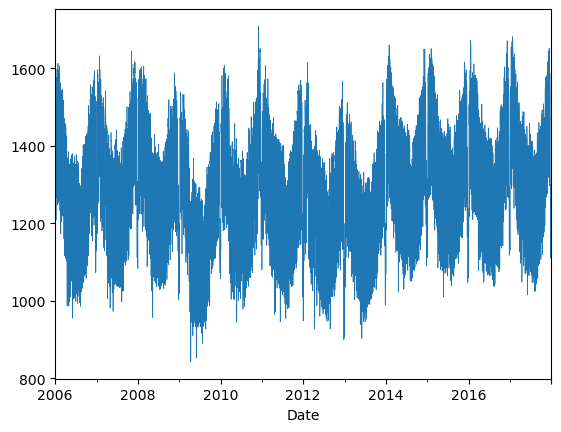

In [91]:
opsd_daily['Consumption'].plot(linewidth=0.5);

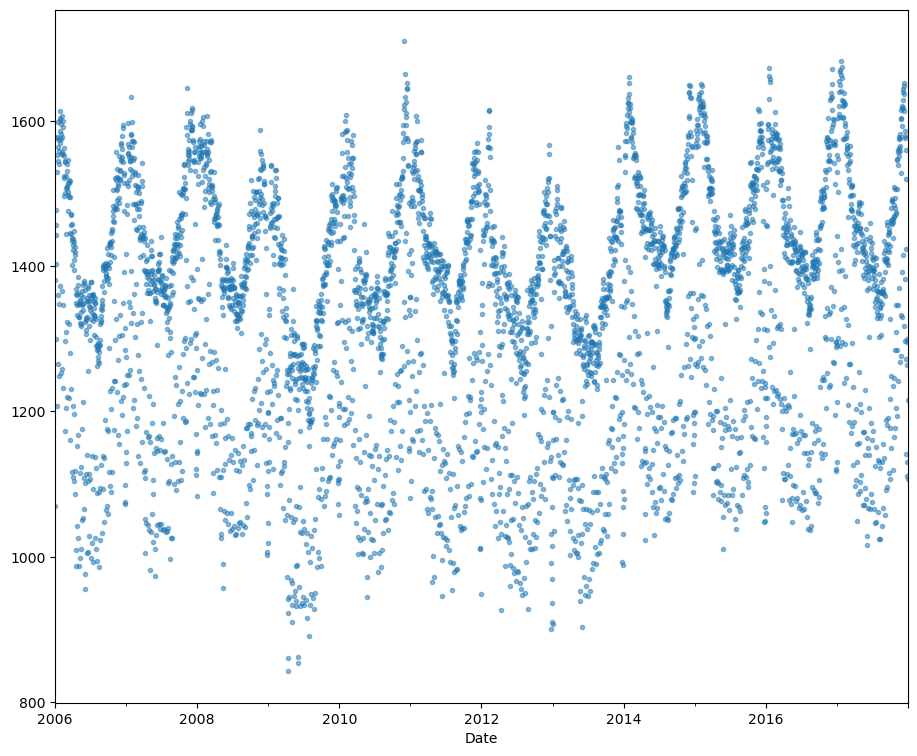

In [92]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle= 'None', figsize=(11,9));

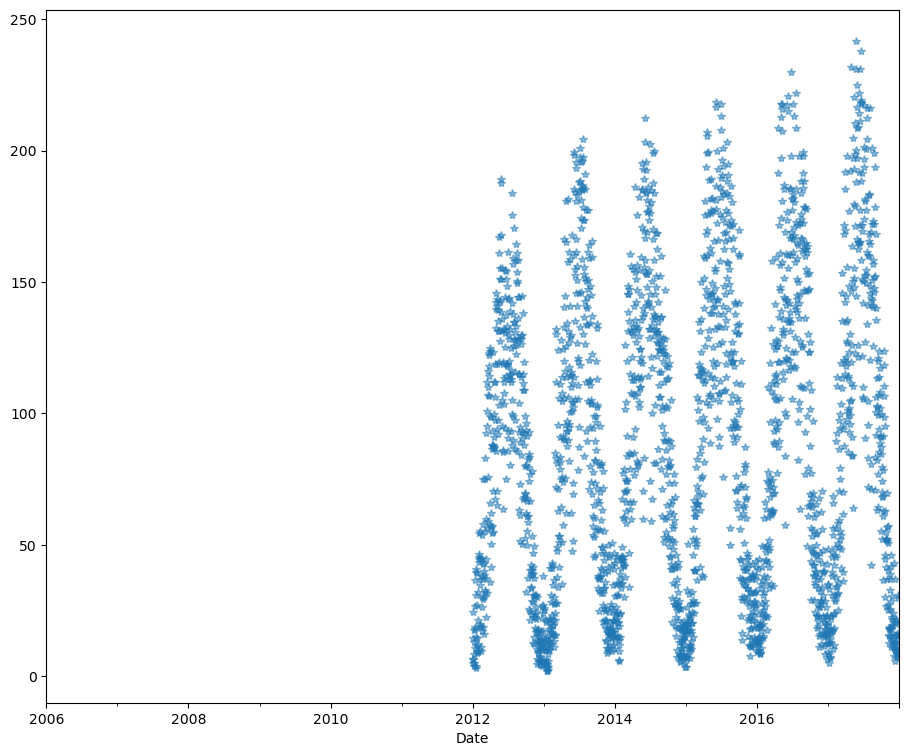

In [93]:
opsd_daily['Solar'].plot(marker='*', alpha=0.5, linestyle= 'None', figsize=(11,9));

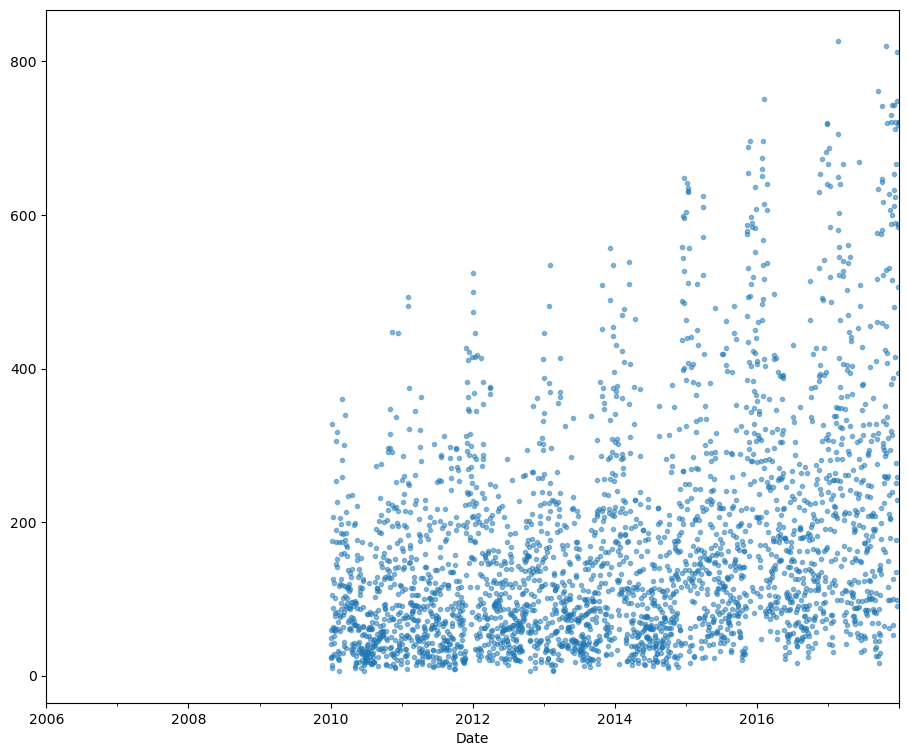

In [94]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle= 'None', figsize=(11,9));

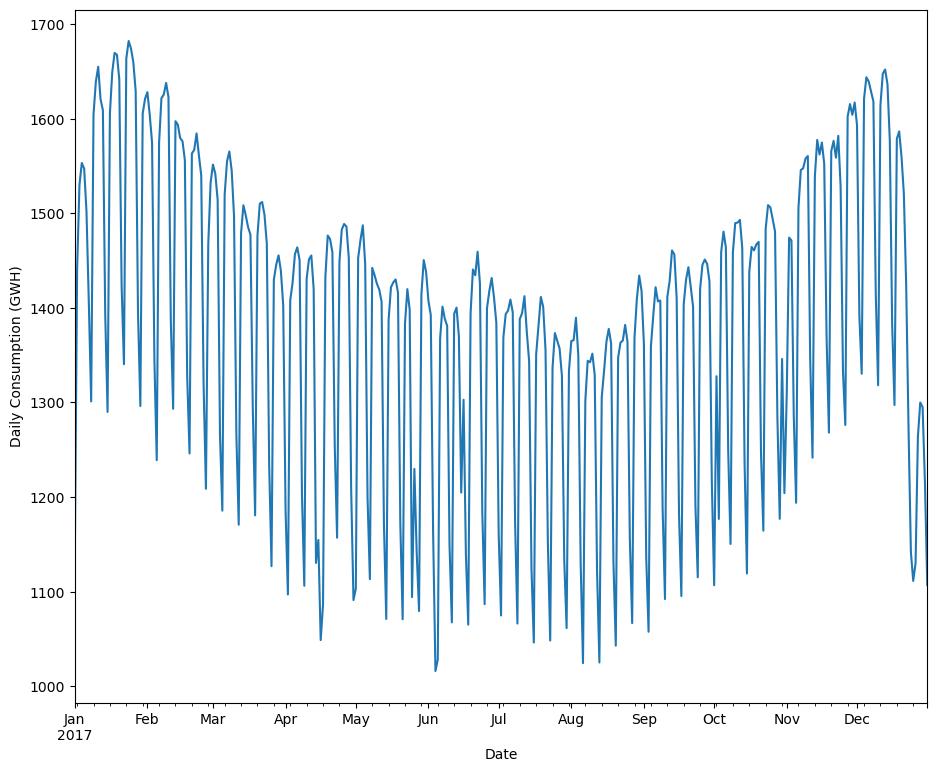

In [95]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWH)');

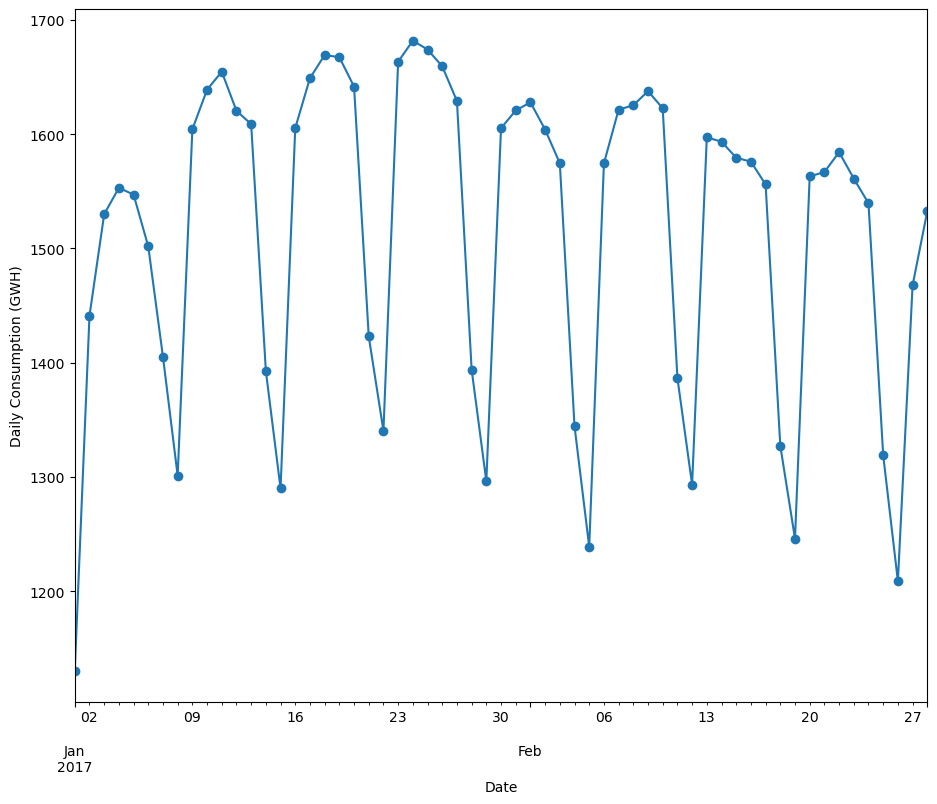

In [96]:
ax = opsd_daily.loc['2017-01' : '2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWH)');

<Axes: title={'center': 'Consumption'}, xlabel='Month'>

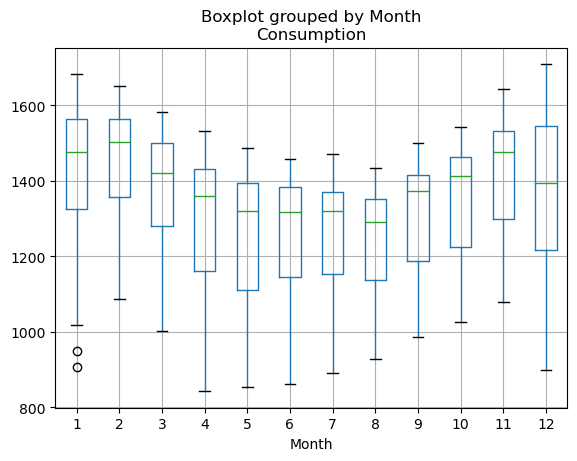

In [97]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<Axes: title={'center': 'Solar'}, xlabel='Month'>

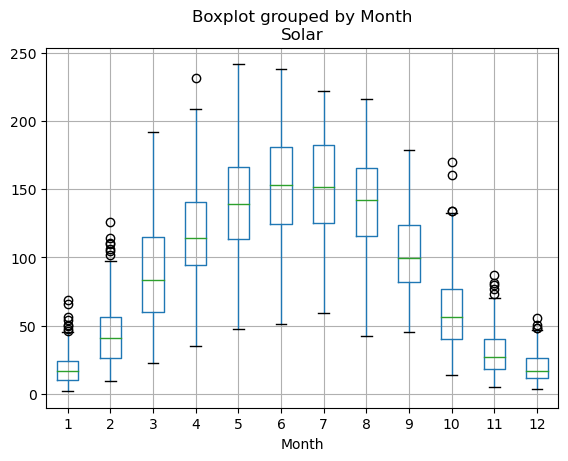

In [98]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<Axes: title={'center': 'Wind'}, xlabel='Month'>

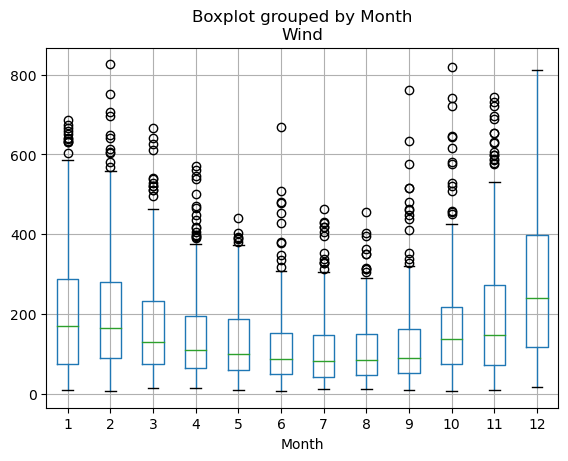

In [99]:
opsd_daily.boxplot(column=['Wind'], by='Month')

<Axes: title={'center': 'Consumption'}, xlabel='Weekday'>

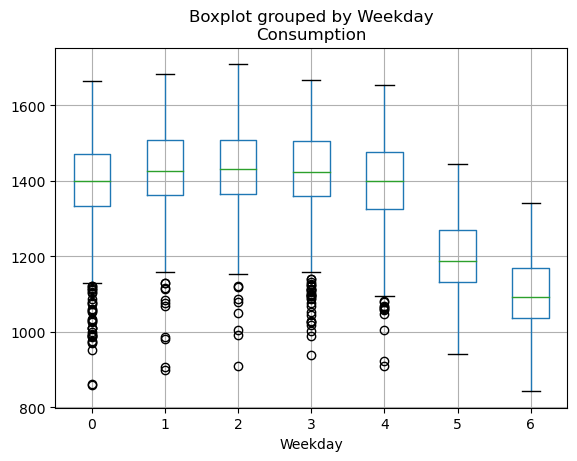

In [100]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

In [101]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [102]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<Axes: xlabel='Date'>

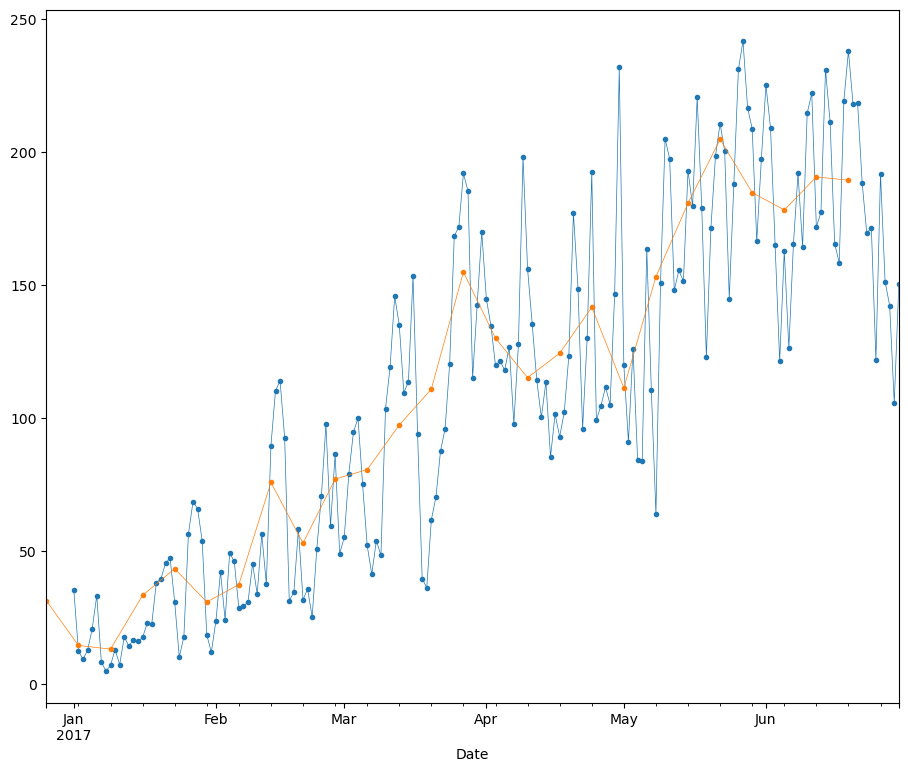

In [103]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11,9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11,9))